In [4]:
%load_ext autoreload
%autoreload 2

from util import *
from rbm import RestrictedBoltzmannMachine 
from dbn import DeepBeliefNet
from twolayer import TwoLayer

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
image_size = [28,28]
train_imgs,train_lbls,test_imgs,test_lbls = read_mnist(dim=image_size, n_train=60000, n_test=10000)

In [6]:


''' restricted boltzmann machine '''
    
print ("\nStarting a Restricted Boltzmann Machine..")

rbm = RestrictedBoltzmannMachine(ndim_visible=image_size[0]*image_size[1],
                                     ndim_hidden=500,
                                     is_bottom=True,
                                     image_size=image_size,
                                     is_top=False,
                                     n_labels=10,
                                     batch_size=10
)
    
a, b, c, d = rbm.cd1(visible_trainset=train_imgs, epochs=1)


Starting a Restricted Boltzmann Machine..
learning CD1
iteration=      0 mean_recon_loss=8.0216
weights: 0.0020534000168750013 bias_v: 0.003947199021083032 bias_h:0.0012850944940979692
iteration=   1000 mean_recon_loss=0.3913
weights: 0.0003084272455325505 bias_v: 0.0004162458207803796 bias_h:0.0010960464143779155
iteration=   2000 mean_recon_loss=0.3350
weights: 0.0002816532137301405 bias_v: 0.00034028614914924664 bias_h:0.0010726971961112959
iteration=   3000 mean_recon_loss=0.2844
weights: 0.0002775794193643005 bias_v: 0.0003536998369644728 bias_h:0.0011042887270640148
iteration=   4000 mean_recon_loss=0.2694
weights: 0.00025860191452317145 bias_v: 0.000299997426628904 bias_h:0.0010186180918008026
iteration=   5000 mean_recon_loss=0.2813
weights: 0.00025622103766205224 bias_v: 0.0003034263723835382 bias_h:0.0009707321253254863


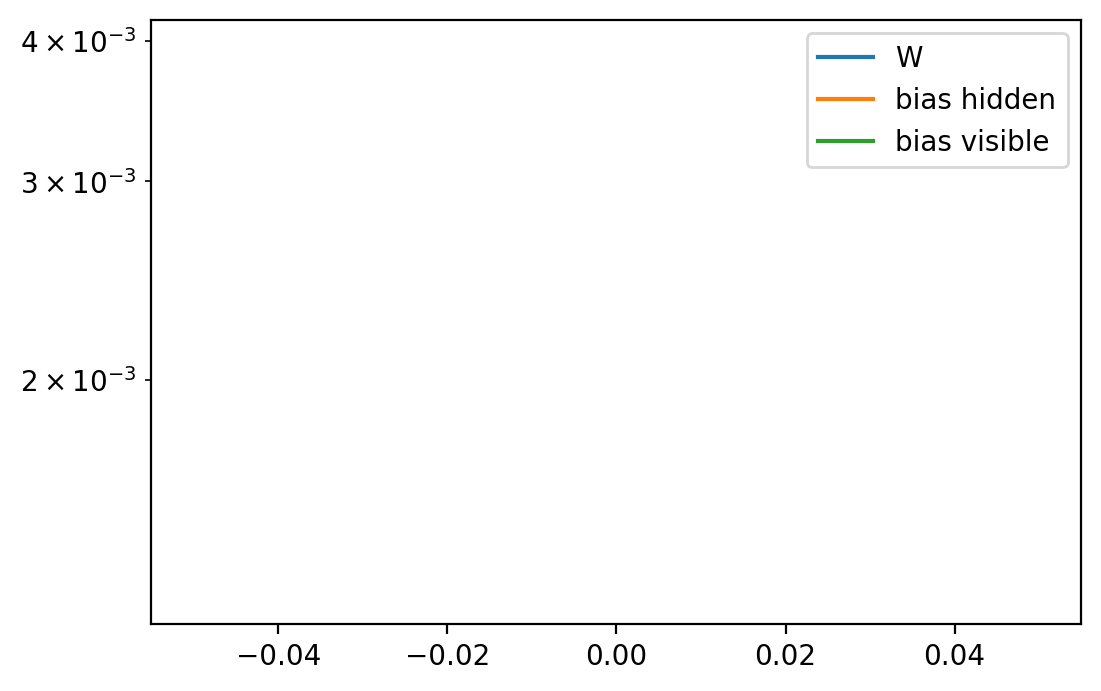

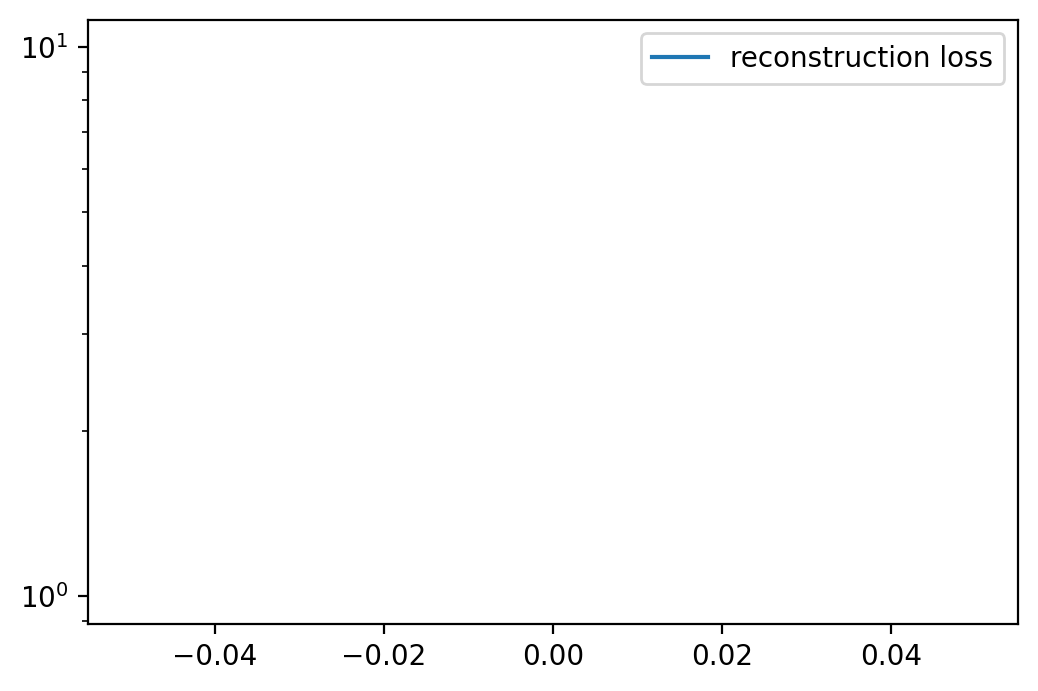

In [7]:
plt.figure(dpi=200)
plt.yscale("log")
plt.plot(a, label="W")
plt.plot(b, label="bias hidden")
plt.plot(c, label="bias visible")
plt.legend()
plt.show()

plt.figure(dpi=200)
plt.yscale("log")
plt.plot(d, label="reconstruction loss")
plt.legend()
plt.show()

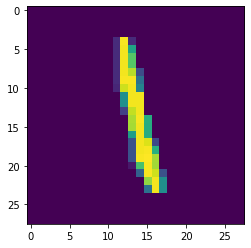

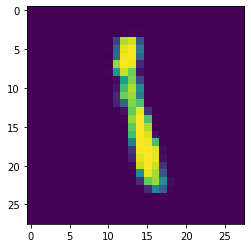

In [8]:
sample = train_imgs[104]
plt.imshow(np.reshape(sample, (28, 28)))
plt.figure()
plt.imshow(np.reshape(rbm.reconstruct(sample), (28, 28)))

## 3.2 DBNs
### 3.2.1 Two-layer DBN

In [9]:
image_size = [28, 28]
train_imgs, train_lbls, test_imgs, test_lbls = read_mnist(dim=image_size, n_train=60000, n_test=10000)

print("Training a Two-Layer DBN..")

dbn = TwoLayer(sizes={"vis": image_size[0] * image_size[1], "hid": 500, "top": 500},
                image_size=image_size,
                batch_size=20
                )

dbn.train_greedylayerwise(vis_trainset=train_imgs, n_iterations=10, verbose=True)


dbn.reconstruct_error(test_imgs)

Training a Two-Layer DBN..
loaded rbm[vis--hid] from twolayer
loaded rbm[hid--top] from twolayer
Reconstruction error on test set is 158372.75613209925


In [10]:
dbn = DeepBeliefNet(sizes={"vis":image_size[0]*image_size[1], "hid":500, "pen":500, "top":2000, "lbl":10},
                        image_size=image_size,
                        n_labels=10,
                        batch_size=10
    )
    
''' greedy layer-wise training '''

dbn.train_greedylayerwise(vis_trainset=train_imgs, lbl_trainset=train_lbls, epochs=2)

loaded rbm[vis--hid] from trained_rbm
loaded rbm[hid--pen] from trained_rbm
loaded rbm[pen+lbl--top] from trained_rbm


In [24]:
ytrue, ypred = dbn.recognize(test_imgs, test_lbls)

accuracy = 90.41%


In [25]:
iWrong = (ytrue!=ypred)
indices = np.arange(len(ytrue))
iWrong
indices = indices[iWrong]
#indices.shape

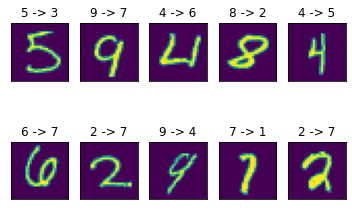

In [27]:
fig, axs = plt.subplots(nrows=2,ncols=5)
axs = axs.flatten()
for i,ind in enumerate(indices[:10]):
    sample = test_imgs[ind]
    axs[i].imshow(np.reshape(sample, (28, 28)))
    axs[i].set(title=f"{ytrue[ind]} -> {ypred[ind]}", yticks=[], xticks=[])


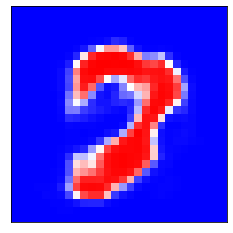

In [29]:
dbn.n_gibbs_gener = 600
fig, axs = plt.subplots(nrows=2,ncols=5)
axs = axs.flatten()
h = dbn.generate(np.array([[1, 0, 0, 0, 0, 0, 0 ,0, 0, 0]]), "new")

h = dbn.generate(np.array([[0, 1, 0, 0, 0, 0, 0 ,0, 0, 0]]), "new")
h = dbn.generate(np.array([[0, 0, 1, 0, 0, 0, 0 ,0, 0, 0]]), "new")
h = dbn.generate(np.array([[0, 0, 0, 1, 0, 0, 0 ,0, 0, 0]]), "new")
h = dbn.generate(np.array([[0, 0, 0, 0, 1, 0, 0 ,0, 0, 0]]), "new")
h = dbn.generate(np.array([[0, 0, 0, 0, 0, 1, 0 ,0, 0, 0]]), "new")
h = dbn.generate(np.array([[0, 0, 0, 0, 0, 0, 1 ,0, 0, 0]]), "new")
h = dbn.generate(np.array([[0, 0, 0, 0, 0, 0, 0 ,1, 0, 0]]), "new")
h = dbn.generate(np.array([[0, 0, 0, 0, 0, 0, 0 ,0, 1, 0]]), "new")
h = dbn.generate(np.array([[0, 0, 0, 0, 0, 0, 0 ,0, 0, 1]]), "new")


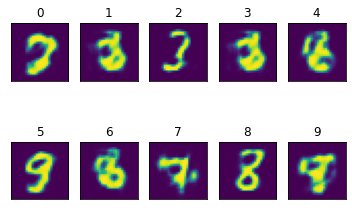

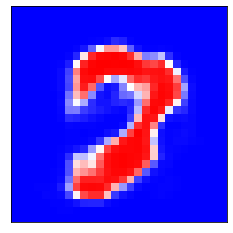

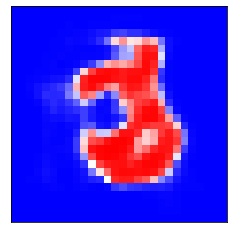

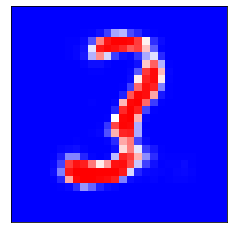

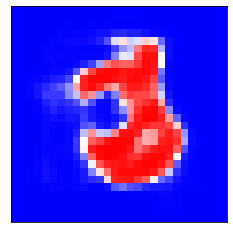

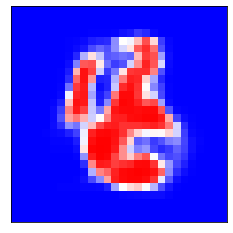

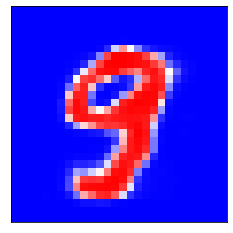

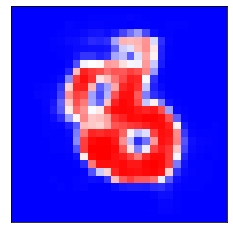

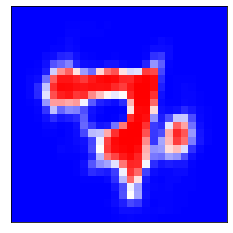

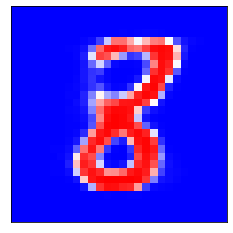

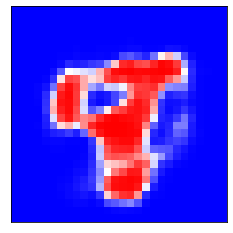

In [44]:
generated = np.eye(10)
fig, axs = plt.subplots(nrows=2,ncols=5)
axs = axs.flatten()
#generated
for i,gen in enumerate(generated):
    #print(gen)
    v,h = dbn.generate(gen[None,:], "new")
    axs[i].imshow(np.reshape(v, (28, 28)))
    axs[i].set(title=f"{np.argmax(gen)}", yticks=[], xticks=[])
    

In [42]:
gen[None,:].shape

(1, 10)

In [39]:
np.array([[1, 0, 0, 0, 0, 0, 0 ,0, 0, 0]]).shape

(1, 10)

The history saving thread hit an unexpected error (OperationalError('database or disk is full')).History will not be written to the database.


In [ ]:
h = dbn.generate(np.array([[1, 0, 0, 0, 0, 0, 0 ,0, 0, 0]]), "new")

In [ ]:
plt.yscale("log")
plt.plot([np.mean(his) for his in h])

In [ ]:
np.mean(np.abs(dbn.rbm_stack["pen+lbl--top"].weight_vh))

In [ ]:
test_lbls

In [22]:
dbn = DeepBeliefNet(sizes={"vis":image_size[0]*image_size[1], "hid":500, "pen":500, "top":2000, "lbl":10},
                        image_size=image_size,
                        n_labels=10,
                        batch_size=10
    )
    
''' greedy layer-wise training '''
dbn.train_wakesleep_finetune(vis_trainset=train_imgs, lbl_trainset=train_lbls, n_iterations=10)


training wake-sleep..


ValueError: matmul: Input operand 1 does not have enough dimensions (has 0, gufunc core with signature (n?,k),(k,m?)->(n?,m?) requires 1)